In [67]:
!pip install plotly requests

In [68]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [69]:
# Fetch global COVID data
url_global = "https://disease.sh/v3/covid-19/all"
global_data = requests.get(url_global).json()

# Fetch country-wise data
url_countries = "https://disease.sh/v3/covid-19/countries"
countries_data = requests.get(url_countries).json()

# Convert to DataFrame
df = pd.DataFrame(countries_data)

# Display first 5 rows
df.head()

,updated,country,countryInfo,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,...,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,1770893453108,Afghanistan,"{'_id': 4, 'iso2': 'AF', 'iso3': 'AFG', 'lat':...",234174,0,7996,0,211080,0,15098,...,1390730,34125,40754388,Asia,174,5097,29,370.46,5179.32,0.0
1,1770893453101,Albania,"{'_id': 8, 'iso2': 'AL', 'iso3': 'ALB', 'lat':...",334863,0,3605,0,330233,0,1025,...,1941032,677173,2866374,Europe,9,795,1,357.59,115209.32,0.0
2,1770893453104,Algeria,"{'_id': 12, 'iso2': 'DZ', 'iso3': 'DZA', 'lat'...",272010,0,6881,0,183061,0,82068,...,230960,5093,45350148,Africa,167,6591,196,1809.65,4036.61,0.0
3,1770893453160,Andorra,"{'_id': 20, 'iso2': 'AD', 'iso3': 'AND', 'lat'...",48015,0,165,0,0,0,47850,...,249838,3225256,77463,Europe,2,469,0,617714.26,0.00,0.0
4,1770893453128,Angola,"{'_id': 24, 'iso2': 'AO', 'iso3': 'AGO', 'lat'...",107327,0,1937,0,103419,0,1971,...,1499795,42818,35027343,Africa,326,18083,23,56.27,2952.52,0.0


In [70]:
# Select important columns
df = df[['country', 'cases', 'todayCases', 'deaths',
         'todayDeaths', 'recovered', 'active',
         'critical', 'tests', 'population']]

# Sort by total cases
df = df.sort_values(by='cases', ascending=False)

df.head()

,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,tests,population
218,USA,111820082,0,1219487,0,109814428,786167,940,1186851502,334805269
94,India,45035393,0,533570,0,0,44501823,0,935879495,1406631776
71,France,40138560,0,167642,0,39970918,0,0,271490188,65584518
77,Germany,38828995,0,183027,0,38240600,405368,0,122332384,83883596
26,Brazil,38743918,0,711380,0,36249161,1783377,0,63776166,215353593


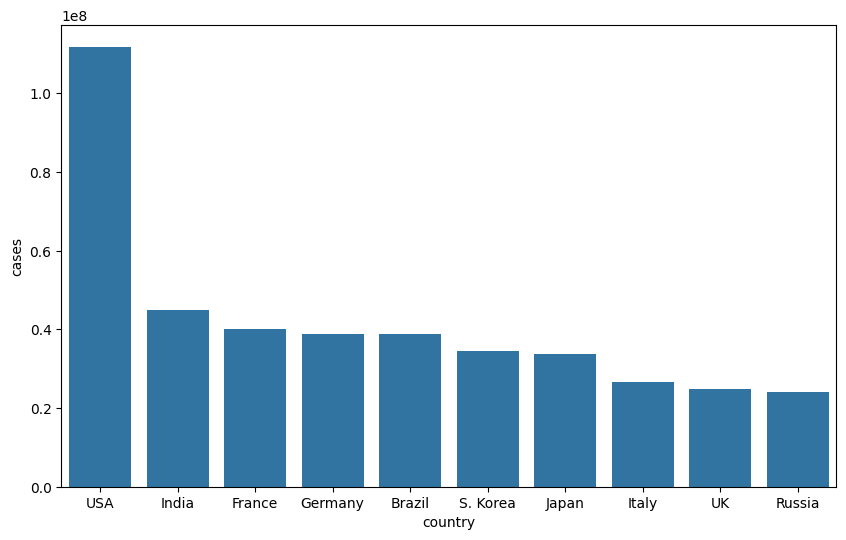

In [71]:
top10 = df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='cases', data=top10)
fig = px.bar(top10,
             x='country',
             y='cases',
             title='Top 10 Countries by Total COVID Cases',
             color='cases',
             text='cases')

plt.show()

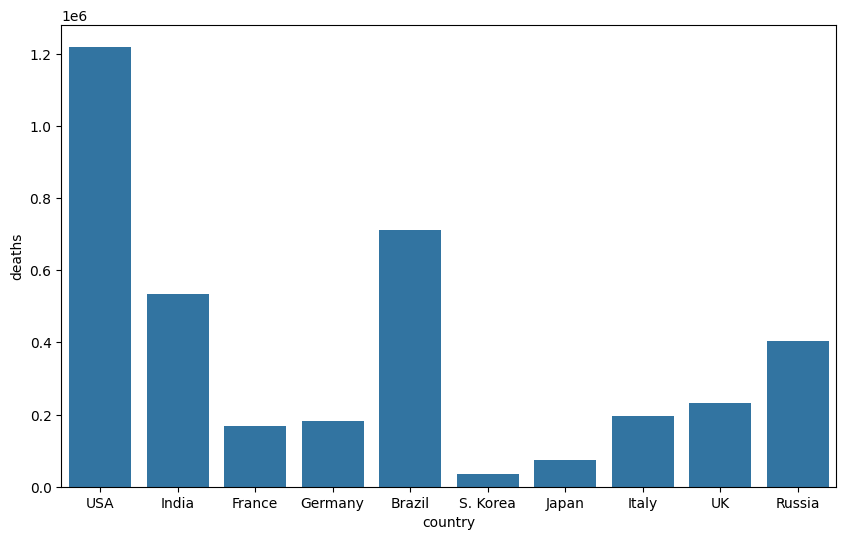

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='deaths', data=top10)
plt.show() # Display the seaborn plot

fig_cases_deaths = px.scatter(df,
                 x='cases',
                 y='deaths',
                 size='recovered',
                 color='country',
                 hover_name='country',
                 title='Cases vs Deaths (Bubble Size = Recovered)')
fig_cases_deaths.show() # Display the plotly scatter plot

In [73]:
fig_active_critical = px.bar(df.head(10),
             x='country',
             y=['active', 'critical'],
             barmode='group',
             title='Active vs Critical Cases (Top 10 Countries)')

fig_active_critical.show()

# Removed seaborn barplot to avoid plt conflict and redundant plotting

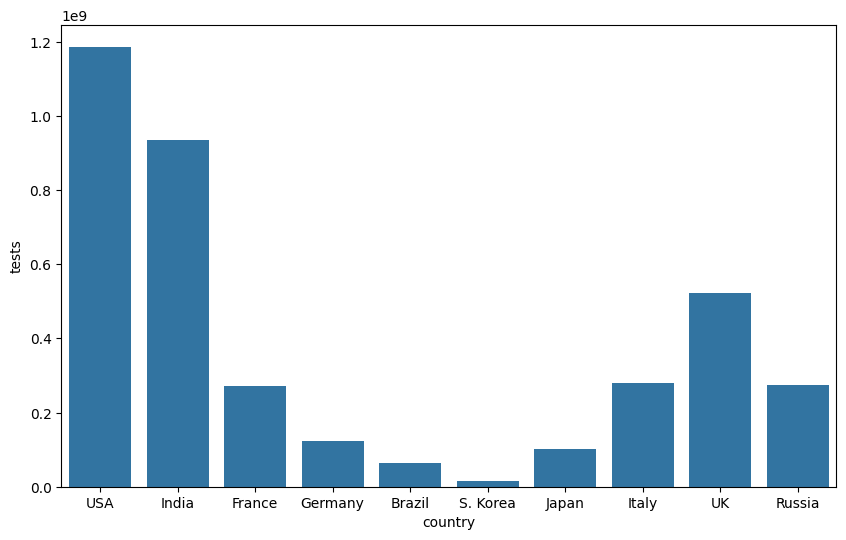

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='tests', data=top10)
plt.show() # Display the seaborn plot

fig_map = px.choropleth(df,
                    locations="country",
                    locationmode="country names",
                    color="cases",
                    hover_name="country",
                    color_continuous_scale="Reds",
                    title="Worldwide COVID-19 Cases Map")
fig_map.show() # Display the plotly map

In [75]:
url_vaccine = "https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=1"
vaccine_data = requests.get(url_vaccine).json()

# Convert to DataFrame
vaccine_list = []

for country in vaccine_data:
    vaccine_list.append({
        "country": country['country'],
        "vaccinations": list(country['timeline'].values())[0]
    })

vaccine_df = pd.DataFrame(vaccine_list)

vaccine_df.head()

,country,vaccinations
0,Afghanistan,22964750
1,Albania,3088966
2,Algeria,15267442
3,Andorra,157072
4,Angola,27819132


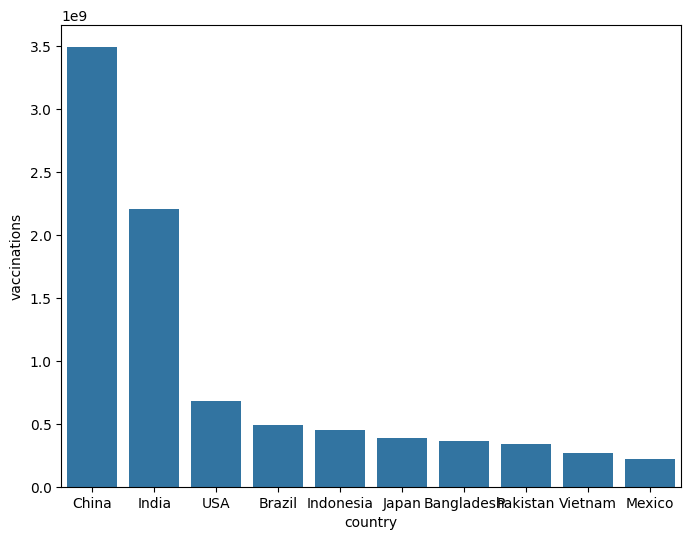

In [76]:
top_vaccine = vaccine_df.sort_values(by="vaccinations", ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x="country", y="vaccinations", data=top_vaccine)
plt = px.bar(top_vaccine,
             x="country",
             y="vaccinations",
             title="Top 10 Countries by Vaccinations",
             color="vaccinations")

plt.show()

In [77]:
country_name = input("Enter Country Name: ")

country_data = df[df['country'].str.lower() == country_name.lower()]

if not country_data.empty:
    print(country_data)
else:
    print("Country not found!")

Enter Country Name: India
   country     cases  todayCases  deaths  todayDeaths  recovered    active  \
94   India  45035393           0  533570            0          0  44501823   

    critical      tests  population  
94         0  935879495  1406631776  


In [78]:
print("🌍 Global COVID-19 Summary")
print("Total Cases:", global_data['cases'])
print("Total Deaths:", global_data['deaths'])
print("Total Recovered:", global_data['recovered'])
print("Total Active:", global_data['active'])

🌍 Global COVID-19 Summary
Total Cases: 704753890
Total Deaths: 7010681
Total Recovered: 675619811
Total Active: 22123398
